# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [2]:

from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [64]:
# Your code here.
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.index = student_data.index+1
student_data

,Age,Tardies
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0
10,30,3


Draw a dispersion diagram (scatter plot) for the data.

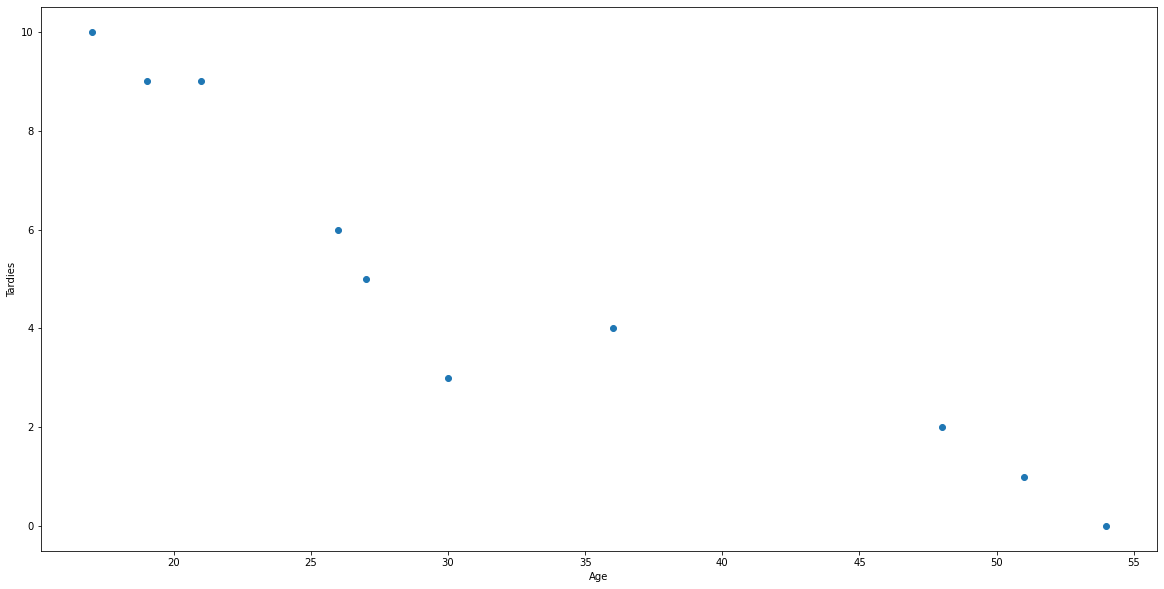

In [60]:
# Your code here.
plt.figure(figsize = (20,10))
plt.scatter(student_data['Age'],student_data['Tardies'])
plt.ylabel("Tardies")
plt.xlabel("Age")
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# There seems to be a clear trend, except with the student aged 30. The older the student the less tardies he has.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


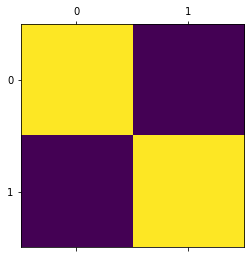

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


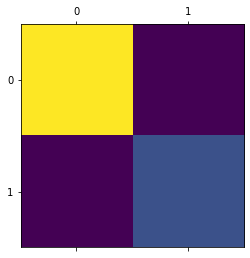

In [72]:
# Your response here.
#correlation:
student_corr=student_data.corr(method ='pearson')
display(student_corr)
plt.matshow(student_corr)
plt.show()
#covariance:
student_cov = student_data.cov()
display(student_cov)
plt.matshow(student_cov)
plt.show()

# There seems to be a very strong negative relationship between both variables. The correlation between them is -0,93 which shows that age is a good predictor for the amount of tardies.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [43]:
# I will use the linear regression model for this exercise.
# The outcome or data is the the amount of "tardies".

model = linear_model.LinearRegression()

In [62]:
x = student_data["Age"]
y = student_data["Tardies"]

In [66]:
x = x.values.reshape(-1, 1)

In [67]:
result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

12.888803363135768

array([-0.24282077])

Plot your regression model on your scatter plot.

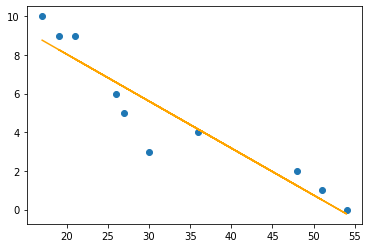

In [73]:
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# As stated before there seems to be a strong correlation between both variables, being the value -0,93, fairly close to -1.
# Age show be a good predictor to guess the tardiness of students.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [25]:
# Import any libraries you may need & the data

vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [83]:
# Your response here. 
vehicles_analysis = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year","CO2 Emission Grams/Mile"]]
vehicles_analysis

# I thought the Cylinders would be the most determinating value to guess the  'CO2 Emission Grams/Mile', but the Fuel Barrels/Year (positive) and the MPG (negative) seem to have the biggest correlations.
# The year seems to be the value with the smallest correlation

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


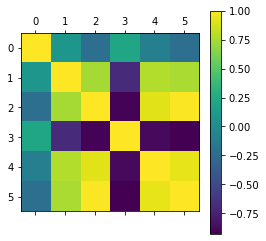

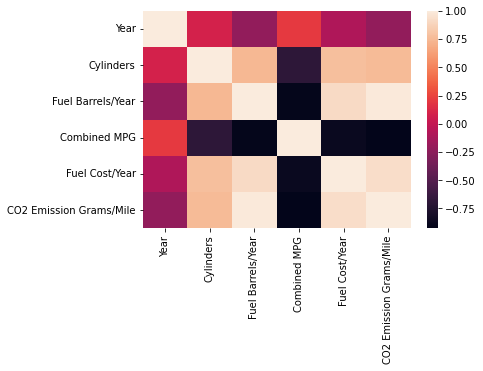

In [85]:
vehicles_analysis_corr=vehicles_analysis.corr(method ='pearson')
display(vehicles_analysis_corr)
plt.matshow(vehicles_analysis_corr)
plt.colorbar() # Do not understand why I get 5 columns on the matrix if we have 6 on the dataset.
plt.show()
sns.heatmap(vehicles_analysis_corr)
plt.show()

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [88]:
# Your response here. 
# Taking into account that we are trying to achieve a prediction for a numeric value, which should be the most approximate possible, I have chosen the linear regression.
# outcome would be the "CO2 Emission Grams/Mile"
X = vehicles_analysis[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year"]]
y = vehicles_analysis["CO2 Emission Grams/Mile"]

In [93]:
model = linear_model.LinearRegression()
result = model.fit(X,y)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [97]:
# Your response here. 
print(result.intercept_)
print(result.coef_)
print(result.score(X,y))

769.8882836465807
[-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
0.9808734920269122


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [98]:
# Your code here.
Error_Analysis = pd.DataFrame({'Invited': [1,3,4,6,8,9,11,14], 'Atendees': [1,2,4,4,5,7,8,13]})
Error_Analysis.index = Error_Analysis.index+1
Error_Analysis


,Invited,Atendees
1,1,1
2,3,2
3,4,4
4,6,4
5,8,5
6,9,7
7,11,8
8,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

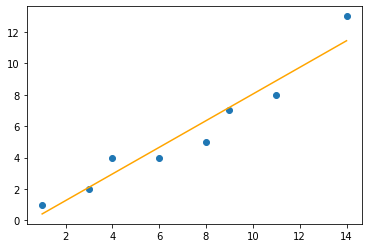

In [100]:
# Your code here.
model = linear_model.LinearRegression()
x = Error_Analysis["Invited"]
y = Error_Analysis["Atendees"]
x = x.values.reshape(-1, 1)
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [102]:
# Your response here. 
print(result.intercept_)
print(result.coef_)
print(result.score(x,y))

# The correlation seems to be strong these 2 variables. The values which differ more from the linear regression are 8 and 14, even if the biggest differences seem to be at 5 and 11.

-0.43939393939393945
[0.84848485]
0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

,Invited,Atendees
1,1,1
2,3,2
3,4,4
4,6,4
6,9,7
7,11,8


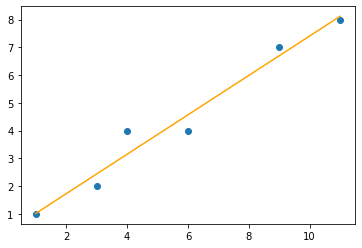

0.30841121495327073
[0.71028037]
0.9639519359145527


In [113]:
# Your response here. 

# For the sake of double-checking my assumptions I will prepare 3 datasets, one excluding  8 and 14, the the second one 5 and 11 and the thrid one only excluding 8

no_outliers1 = Error_Analysis.loc[(Error_Analysis["Invited"] != 8) & (Error_Analysis["Invited"] !=14)]
display(no_outliers1)

model = linear_model.LinearRegression()
x = no_outliers1["Invited"]
y = no_outliers1["Atendees"]
x = x.values.reshape(-1, 1)
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()
print(result.intercept_)
print(result.coef_)
print(result.score(x,y))

,Invited,Atendees
1,1,1
2,3,2
3,4,4
4,6,4
5,8,5
6,9,7
8,14,13


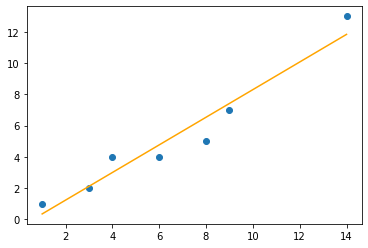

-0.542713567839197
[0.88442211]
0.9377005509475086


In [114]:
no_outliers2 = Error_Analysis.loc[(Error_Analysis["Invited"] != 5) & (Error_Analysis["Invited"] !=11)]
display(no_outliers2)

model = linear_model.LinearRegression()
x = no_outliers2["Invited"]
y = no_outliers2["Atendees"]
x = x.values.reshape(-1, 1)
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()
print(result.intercept_)
print(result.coef_)
print(result.score(x,y))

,Invited,Atendees
1,1,1
2,3,2
3,4,4
4,6,4
5,8,5
6,9,7
8,14,13


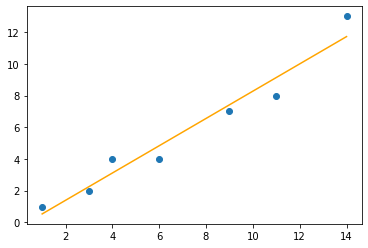

-0.32751091703056723
[0.86026201]
0.9520877287669889


In [116]:
no_outliers3 = Error_Analysis.loc[Error_Analysis["Invited"] != 8]
display(no_outliers2)

model = linear_model.LinearRegression()
x = no_outliers3["Invited"]
y = no_outliers3["Atendees"]
x = x.values.reshape(-1, 1)
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()
print(result.intercept_)
print(result.coef_)
print(result.score(x,y))

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# The result with the data already provides a high result to obtain a reliable prediction, but removing the problematic points the result improves even more by reaching 96,4% after removing 8 and 11.